# Вычислительная математика Домашнее задание по теме 1

# Задача 2а)

![task2](task2.png)

## 1.Реализовать метод численного решения

В метод предлагается реализовать Схему Чехарда : для того чтобы получить значение $y_1$ используем явный метод Эйлера

In [118]:
import numpy as np
def f(x):
    answer=np.zeros(2)
    answer[0],answer[1]=x[1],x[0]
    answer[1]=-answer[1]*answer[1]*answer[1]
    return answer

In [119]:
#Принимает в себя шаг, возвращает вектор значений на сетке
def leapfrog(step,iterations):
    y=np.zeros((iterations+1,2))
    y[0][0]=1 #В первой координате лежит u
    y[0][1]=0 #Во второй координате лежит v

    y[1]=step*f(y[0])+y[0]
    
    for i in range(2,iterations):
        y[i+1]=2*step*f(y[i])+y[i-1]

    return y

step is 0.05, number of iterations is 160
len of values is 161


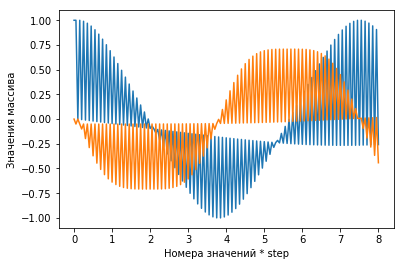

In [120]:
import matplotlib.pyplot as plt
import math
step=0.05
iterations=math.floor(8/step)
print("step is {}, number of iterations is {}".format(step,iterations))
y_values=leapfrog(step,iterations)
print("len of values is {}".format(len(y_values)))
x_values = [i*step for i in range(len(y_values))]

plt.plot(x_values, y_values)

plt.xlabel('Номера значений * step')
plt.ylabel('Значения массива')


plt.show()

## 2.Исследовать метод на устойчивость

### Применим одномерный метод к уравнению Далквиста :

### $$\frac{y_{i+1}-y_{i-1}}{2\Delta t}=\lambda y_i$$

### $$y_{i+1}=2\Delta t \lambda y_i + y_{i-1}$$

### $$\Theta^2=2\Theta z+1$$

### $$z=\frac{\Theta^2-1}{2\Theta}=\frac{\exp{2i\phi}-1}{2\exp{i\phi}}=\frac{1}{2}e^{i\phi}-\frac{1}{2}e^{-i \phi}=-i\sin\phi$$

### $$|\Delta t \lambda|<1$$

Теперь найдем собственные числа нашей матрицы :

### $$
\mathbf{J}=
\left(\begin{array}{cc} 
0 & 1\\
-3u^2 & 0
\end{array}\right)
$$ 

$$\lambda_{1,2}=\pm i\sqrt{3}u$$

$$|\Delta t \sqrt{3} u|<1 $$

При устойчивом решении величина решения не должна возрастать, значит максимальное значение решения достигается в начальный момент времени, т.е $\Delta t < 3^{-1/2}$

## 3.Экспериментально определить порядок сходимости, исследуя ошибку численного решения

In [125]:
def get_delta(iterations):
    step=7.416298709205487/iterations
    if step >= 1/math.sqrt(3):
        raise ValueError('too small step !') #Чтобы не было бед с устойчивостью
    
#    print("step is {}, number of iterations is {}".format(step,iterations))
    y_values=leapfrog(step,iterations)
    return step,np.linalg.norm(y_values[-1]-y_values[0])

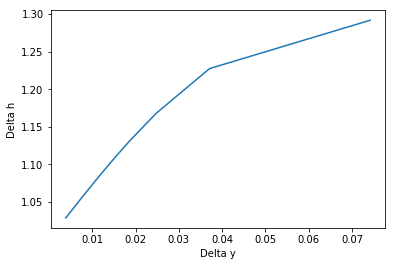

In [138]:
Deltas=[]
steps=[]
for i in range(100,2000,100):
    Deltas.append(get_delta(i)[1])
    steps.append(get_delta(i)[0])

plt.plot(steps, Deltas)
plt.xlabel("Delta y")
plt.ylabel("Delta h")
#plt.yscale('log')
plt.show()

Порядок аппроксимации метода - второй, на картинке кажись нарисована линия

## 4.Построить графики $u(t),v(t)$

step is 0.02, number of iterations is 800
len of values is 801


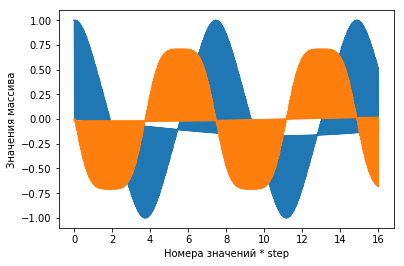

In [6]:
import matplotlib.pyplot as plt
import math
step=0.02
iterations=math.floor(16/step)
print("step is {}, number of iterations is {}".format(step,iterations))
y_values=leapfrog(step,iterations)
print("len of values is {}".format(len(y_values)))
x_values = [i*step for i in range(len(y_values))]

plt.plot(x_values, y_values)

plt.xlabel('Номера значений * step')
plt.ylabel('Значения массива')


plt.show()

# Задача 3а)

![task3](task3.png)

## 1.Реализовать метод численного решения, построить графики

Предлагается реализовать неявный метод Эйлера

## $$\frac{y_{i+1}-y_i}{\Delta t}=f(t_{i+1},y_{i+1})$$

### $$y_{i+1}-y_i-\Delta t f(t_{i+1},y_{i+1})=0$$

In [7]:
pi=math.pi
t_d=24*60*60

In [59]:
import numpy as np
from scipy.optimize import fsolve
k=np.array([(10**(-2))*max(0,math.sin(2*pi/t_d)),10**5,10**(-16)])
c=np.array([0,0,5*(10**11),8*(10**11)])

def f(self,x):
    answer=np.zeros(4)
    answer[0]=k[0]*x[2]-k[1]*x[0]
    answer[1]=k[0]*x[2]-k[2]*x[1]*x[3]
    answer[2]=k[2]*x[1]*x[3]-k[0]*x[2]
    answer[3]=k[1]*x[0]-k[2]*x[1]*x[3]
    return answer
    
class ImplicitEuler:
    def __init__(self, f, y0, t0, tn, h):
        self.f = f
        self.y0 = y0
        self.t0 = t0
        self.tn = tn
        self.h = h
        self.n = int((tn - t0) / h) + 1

    def solve(self):
        t = np.linspace(self.t0, self.tn, self.n)
        y = np.zeros((self.n, len(self.y0)))
        y[0] = self.y0
        for i in range(1, self.n):
            f_ = lambda x: x - y[i-1] - self.h * self.f(t[i], x)
            y[i] = fsolve(f_, y[i-1])
        return t, y

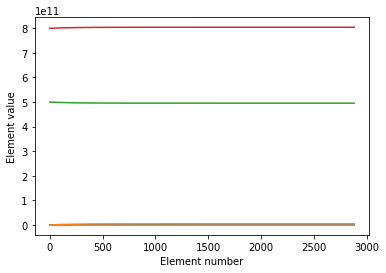

In [76]:
Eucler=ImplicitEuler(f,c,0,2*t_d,60)
arrt,arry=Eucler.solve()
plt.plot(range(len(arry)), arry)
plt.xlabel("Element number")
plt.ylabel("Element value")
#plt.yscale('log')
plt.show()

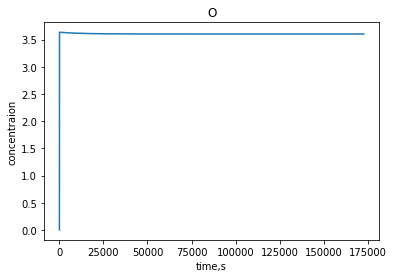

In [77]:
arr=arry[:, 0]
plt.plot(arrt, arr)
plt.title("O")
plt.xlabel("time,s")
plt.ylabel("concentraion")
#plt.yscale('log')
plt.show()

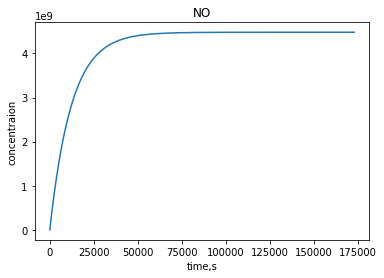

In [78]:
arr=arry[:, 1]
plt.plot(arrt, arr)
plt.xlabel("time,s")
plt.ylabel("concentraion")
plt.title("NO")
#plt.yscale('log')
plt.show()

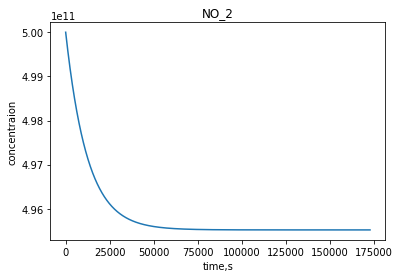

In [79]:
arr=arry[:, 2]
plt.plot(arrt, arr)
plt.xlabel("time,s")
plt.ylabel("concentraion")
plt.title("NO_2")
#plt.yscale('log')
plt.show()

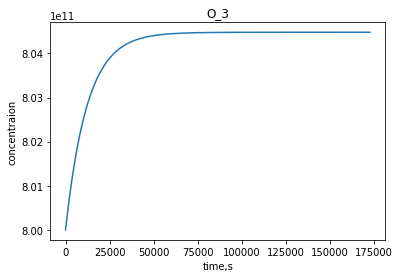

In [80]:
arr=arry[:, 3]
plt.plot(arrt, arr)
plt.xlabel("time,s")
plt.ylabel("concentraion")
plt.title("O_3")
#plt.yscale('log')
plt.show()

## 2.Исследовать метод на устойчивость

Линеаризуем систему  : 

### $$
\mathbf{J}=
\left(\begin{array}{cccc} 
-k_2 & 0 & k_1 & 0\\
0    & -k_3c_4 & k_1 &-k_3c_2\\
0 & k_3c_4 & -k_1 & k_3c_2\\
k_2 & -k_3c_4 & 0 & -k_3c_2
\end{array}\right)
$$ 

При устойчивом счете величина решения не должна возрастать, значит максимальное значение решения достигается в начальный момент времени

In [29]:
k=np.array([(10**(-2))*max(0,math.sin(2*pi/t_d)),10**5,10**(-16)])
c=np.array([0,0,5*(10**11),8*(10**11)])

In [30]:
Y=np.matrix([[-k[1],0,k[0],0],[0,-k[2]*c[3],k[0],-k[2]*c[1]],[0,k[2]*c[3],-k[0],-k[2]*c[1]],[k[1],-k[2]*c[3],0,-k[2]*c[1]]])

In [31]:
Y

matrix([[-1.00000000e+05,  0.00000000e+00,  7.27220521e-07,
          0.00000000e+00],
        [ 0.00000000e+00, -8.00000000e-05,  7.27220521e-07,
         -0.00000000e+00],
        [ 0.00000000e+00,  8.00000000e-05, -7.27220521e-07,
         -0.00000000e+00],
        [ 1.00000000e+05, -8.00000000e-05,  0.00000000e+00,
         -0.00000000e+00]])

In [32]:
np.linalg.eigvals(Y)

array([-0.00000000e+00, -1.00000000e+05,  0.00000000e+00, -8.07272205e-05])

Метод является А-устойчивым, все собственные числа слева или на от оси, значnт все хорошо

## 3.Экспериментально определить шаг по времени, при котором явный метод Эйлера для данной задачи устойчив

In [102]:
k=np.array([(10**(-2))*max(0,math.sin(2*pi/t_d)),10**5,10**(-16)])
c=np.array([0,0,5*(10**11),8*(10**11)])

def f(x):
    answer=np.zeros(4)
    answer[0]=k[0]*x[2]-k[1]*x[0]
    answer[1]=k[0]*x[2]-k[2]*x[1]*x[3]
    answer[2]=k[2]*x[1]*x[3]-k[0]*x[2]
    answer[3]=k[1]*x[0]-k[2]*x[1]*x[3]
    return answer

In [103]:
import numpy as np

class ExplicitEuler:
    def __init__(self, f, x0, t0, tn, h):
        self.f = f
        self.x0 = x0
        self.t0 = t0
        self.tn = tn
        self.h = h

    def solve(self):
        n = int((self.tn - self.t0) / self.h)  # количество шагов
        t = np.linspace(self.t0, self.tn, n + 1)  # массив значений времени
        x = np.zeros((n + 1, len(self.x0)))  # массив значений решения
        x[0] = self.x0  # начальные условия

        # Цикл решения методом Эйлера
        for i in range(n):
            x[i+1] = x[i] + self.h*self.f( x[i])

        return t, x


$|1+\lambda \Delta t| \leq 1$

$|1-\lambda \Delta t|\approx |\lambda| \Delta t \leq 1$

$\Delta t \leq 1/\lambda$

In [110]:
np.linalg.eigvals(Y)

array([-0.00000000e+00, -1.00000000e+05,  0.00000000e+00, -8.07272205e-05])

Т.е. шаг по времени должен быть порядка $10^{-5}$

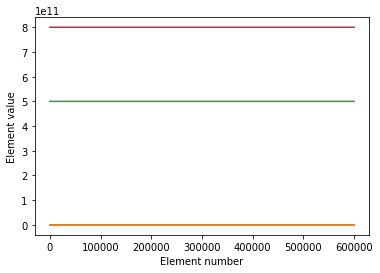

In [115]:
Eucler=Explicit_Euler(f,c,0,6,10**(-5))
arrt,arry=Eucler.solve()
plt.plot(range(len(arry)), arry)
plt.xlabel("Element number")
plt.ylabel("Element value")
plt.show()

Порядки больше он не берет : 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


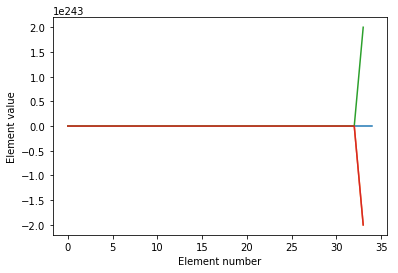

In [116]:
Eucler=Explicit_Euler(f,c,0,6,10**(-4))
arrt,arry=Eucler.solve()
plt.plot(range(len(arry)), arry)
plt.xlabel("Element number")
plt.ylabel("Element value")
plt.show()

Неявный метод он считал по минуте и все было стабильно (можно брать время и сильно больше)
Явный метод для стабильного подсчета надо брать какие-то стремные __милионные доли__ и то если брать временные отрезки существенные, то он успешно вешает мой компьютер   
__Вердикт : неявный метод 9 кислородов из десяти__   
__Явный : воняет слабостью__   